In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

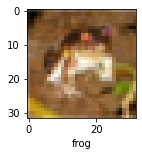

In [10]:
plot_sample(X_train, y_train, 0)

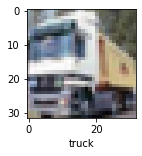

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 3ms/step - loss: 1.8112 - accuracy: 0.3561
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6223 - accuracy: 0.4276
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5410 - accuracy: 0.4556
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4810 - accuracy: 0.4772
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4325 - accuracy: 0.4965
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3887 - accuracy: 0.5106
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3522 - accuracy: 0.5227
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3149 - accuracy: 0.5365
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2858 - accuracy: 0.5495
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.255

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.49      0.57      1000
           1       0.44      0.81      0.57      1000
           2       0.40      0.38      0.39      1000
           3       0.39      0.30      0.34      1000
           4       0.31      0.66      0.42      1000
           5       0.51      0.29      0.37      1000
           6       0.64      0.44      0.52      1000
           7       0.69      0.44      0.54      1000
           8       0.74      0.51      0.60      1000
           9       0.52      0.54      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.53      0.49      0.49     10000
weighted avg       0.53      0.49      0.49     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 1.4969 - accuracy: 0.4587
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1353 - accuracy: 0.6004
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0066 - accuracy: 0.6492
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9253 - accuracy: 0.6757
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8558 - accuracy: 0.7038
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8010 - accuracy: 0.7221
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7549 - accuracy: 0.7360
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7093 - accuracy: 0.7504
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6709 - accuracy: 0.7648
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.63

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9120 - accuracy: 0.7006


[0.911972165107727, 0.7006000280380249]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.39081720e-04, 1.03599405e-06, 9.29012604e-05, 8.90787125e-01,
        1.31048640e-04, 1.01969048e-01, 5.21351816e-03, 5.05112484e-06,
        1.65830937e-03, 2.93795620e-06],
       [7.59420334e-04, 7.29993209e-02, 6.36544974e-06, 2.29908636e-07,
        6.03636110e-08, 1.14075505e-08, 1.21898491e-08, 5.89281601e-09,
        9.26147699e-01, 8.68532152e-05],
       [1.13774918e-01, 1.56988725e-01, 2.25108117e-03, 4.55083186e-03,
        1.34714518e-03, 5.44569455e-04, 2.65500799e-04, 1.75346469e-03,
        6.43188596e-01, 7.53351822e-02],
       [7.02210844e-01, 9.55445990e-02, 1.69699620e-02, 1.71174773e-03,
        3.45780049e-03, 2.24398518e-05, 6.15102108e-05, 1.00587618e-04,
        1.63978294e-01, 1.59422532e-02],
       [9.68963008e-08, 1.64473775e-07, 1.16184563e-03, 1.57435646e-03,
        1.01427119e-02, 6.41838051e-05, 9.87056613e-01, 3.13831272e-08,
        6.21014493e-08, 2.71404010e-09]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

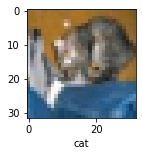

In [22]:
plot_sample(X_test, y_test,0)

In [23]:
classes[y_classes[0]]

'cat'

In [42]:
from google.colab import files
upload = files.upload()

Saving cat1.jpg to cat1.jpg


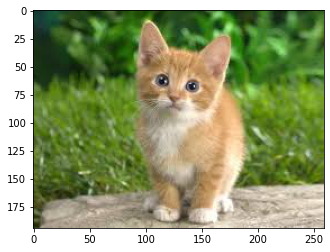

In [43]:
new_image = plt.imread('cat1.jpg')
img=plt.imshow(new_image)

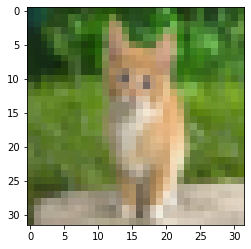

In [44]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [45]:
predictions = cnn.predict(np.array([resized_image]))
predictions

array([[5.0534190e-06, 2.1821093e-06, 7.2075367e-02, 2.2715496e-01,
        3.7891036e-01, 2.6709250e-01, 5.4459304e-02, 2.9881104e-04,
        5.0558464e-07, 9.8960447e-07]], dtype=float32)

In [47]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[4, 5, 3, 2, 6, 7, 0, 1, 9, 8]


In [53]:
for i in range(5):
  print(classes[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')


deer : 37.89 %
dog : 26.71 %
cat : 22.72 %
bird : 7.21 %
frog : 5.45 %
